### Setup

In [ ]:
import tensorflow as tf

In [ ]:
!pwd

In [3]:
tf.__version__

'2.15.0'

In [ ]:
# To generate GIFs
!pip install imageio
!export TF_GPU_ALLOCATOR=cuda_malloc_async
!pip install git+https://github.com/tensorflow/docs

In [5]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
from tensorflow import keras
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

/home/dwidar/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [6]:

keras.mixed_precision.set_global_policy("mixed_float16")
gen = ImageDataGenerator(rescale=1./255).flow_from_directory("dataset/", target_size=(192, 128), batch_size=8,color_mode='grayscale')



INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3060 Laptop GPU, compute capability 8.6


2024-05-28 20:45:49.559726: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-28 20:45:49.612358: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-28 20:45:49.612651: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 202599 images belonging to 2 classes.


In [7]:
#draw first image
# plt.imshow(gen.next()[0][0])
# plt.show()

In [9]:
BUFFER_SIZE = 60000
BATCH_SIZE = 128

## Create the models

Both the generator and discriminator are defined using the [Keras Sequential API](https://www.tensorflow.org/guide/keras#sequential_model).

new_rows = ((rows - 1) * strides[0] + kernel_size[0] - 2 * padding[0] + output_padding[0])  
new_cols = ((cols - 1) * strides[1] + kernel_size[1] - 2 * padding[1] + output_padding[1])

In [11]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16*16*200, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.PReLU())

    model.add(layers.Reshape((16, 16, 200)))
    

    model.add(layers.Conv2DTranspose(64, (5, 5),strides = (2,2), padding='same', use_bias=False))
    
    model.add(layers.BatchNormalization())
    model.add(layers.PReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5),strides = (3,2), padding='same', use_bias=False))
    
    model.add(layers.BatchNormalization())
    model.add(layers.PReLU())

   

    model.add(layers.Conv2DTranspose(1, (3, 3),strides = (2,2), padding='same', use_bias=False, activation='sigmoid'))
    

    return model

2024-05-28 20:45:54.369075: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-28 20:45:54.369549: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-28 20:45:54.369775: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 51200)             5120000   
                                                                 
 batch_normalization (Batch  (None, 51200)             204800    
 Normalization)                                                  
                                                                 
 p_re_lu (PReLU)             (None, 51200)             51200     
                                                                 
 reshape (Reshape)           (None, 16, 16, 200)       0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 32, 32, 64)        320000    
 anspose)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        2

2024-05-28 20:45:55.120353: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-28 20:45:55.442454: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-05-28 20:45:55.630085: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


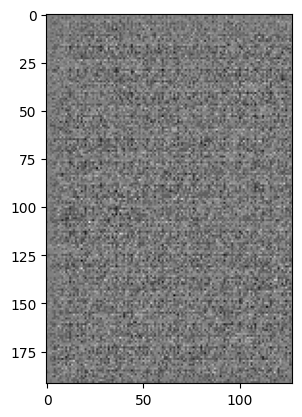

In [12]:
generator = make_generator_model()
print(generator.summary())
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [13]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), padding='same',
                                     input_shape=[192, 128, 1]))
    model.add(layers.PReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (5, 5),strides = (2,2), padding='same'))
    model.add(layers.PReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(32, (5, 5),strides = (3,2), padding='same'))
    model.add(layers.PReLU())
    model.add(layers.Dropout(0.1))

    # model.add(layers.Conv2D(32, (5, 5),strides = (3,3), padding='same'))
    # model.add(layers.PReLU())

    model.add(layers.Flatten())

    model.add(layers.Dense(64))
    model.add(layers.PReLU())
    model.add(layers.Dense(32))

    #model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [14]:
discriminator = make_discriminator_model()
discriminator.summary()
decision = discriminator(generated_image)
print (decision)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 192, 128, 64)      1664      
                                                                 
 p_re_lu_3 (PReLU)           (None, 192, 128, 64)      1572864   
                                                                 
 dropout (Dropout)           (None, 192, 128, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 64, 64)        102464    
                                                                 
 p_re_lu_4 (PReLU)           (None, 96, 64, 64)        393216    
                                                                 
 dropout_1 (Dropout)         (None, 96, 64, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)       

## Define the loss and optimizers

Define loss functions and optimizers for both models.


In [15]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [16]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss, real_loss, fake_loss

In [17]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [18]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### Save checkpoints
This notebook also demonstrates how to save and restore models, which can be helpful in case a long running training task is interrupted.

In [19]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## Define the training loop


In [20]:
EPOCHS = 500
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

The training loop begins with generator receiving a random seed as input. That seed is used to produce an image. The discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator). The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.

In [21]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss, real_loss, fake_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss, disc_loss, real_loss, fake_loss

In [22]:
def train(gen, epochs):
  gen_hist = []
  disc_hist = []
  disc_real_hist = []
  disc_fake_hist = []
  for epoch in range(epochs):
    start = time.time()

    image_batch = gen.next()[0]
    g_loss, d_loss, d_real_loss, d_fake_loss = train_step(image_batch)
    g_loss = g_loss.numpy()
    d_loss = d_loss.numpy()
    d_real_loss = d_real_loss.numpy()
    d_fake_loss = d_fake_loss.numpy()
    gen_hist.append(g_loss)
    disc_hist.append(d_loss)
    disc_real_hist.append(d_real_loss)
    disc_fake_hist.append(d_fake_loss)
    print("G_loss:", g_loss, "D_loss:", d_real_loss, d_fake_loss, d_loss)

    # Produce images for the GIF as you go
    # display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  # display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)
  plot_history(disc_real_hist, disc_fake_hist, disc_hist, gen_hist)

**Generate and save images**


In [23]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 255, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [24]:
def plot_history(d1_hist, d2_hist, d_hist, g_hist):
  # plot loss
  plt.plot(d1_hist, label='d-real')
  plt.plot(d2_hist, label='d-fake')
  plt.plot(d_hist, label='d-total')
  plt.plot(g_hist, label='gen')
  plt.legend()
  # save plot to file
  plt.savefig('plot_loss.png')
  plt.show()
  plt.close()

## Train the model
Call the `train()` method defined above to train the generator and discriminator simultaneously. Note, training GANs can be tricky. It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).

At the beginning of the training, the generated images look like random noise. As training progresses, the generated digits will look increasingly real. After about 50 epochs, they resemble MNIST digits. This may take about one minute / epoch with the default settings on Colab.

In [ ]:
train(gen, EPOCHS)

Restore the latest checkpoint.

In [26]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

## Create a GIF


In [27]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

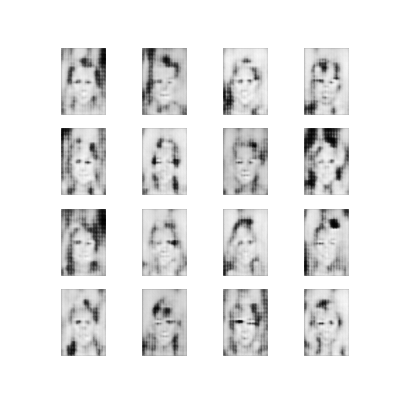

In [28]:
display_image(EPOCHS)

Use `imageio` to create an animated gif using the images saved during training.

In [29]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

In [ ]:
#generate 10 images
noise = tf.random.normal([10, 100])
generated_image = generator(noise, training=False)

for i in range(10):
    plt.imshow(generated_image[i, :, :, 0], cmap='gray')
    plt.show()